Focus: In this notebook, we take the Hotel Booking Dataset and create a Logistic Regression model using Scikit Lean Package. This model will take numerical and categorical feautures to predict whether a booking will be canceled or not (1 and 0). This nootebook outlines model construction and model performance. 

Note : The focus is not for a deep interpretation of variables, however, we are instead looking to build the best model at predicting is_canceled. Scikit Learn is a Machine Learning algorithm package that does not provide hypothesis test results. 

# Importing Packages:

In [306]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

# Importing Dataset

In [330]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) #display all columns when using pandas dataframe
df = pd.read_csv('hotel_bookings.csv')
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Creating Date Column and Filtering 2017 Observations

In [308]:
#combining date columns into a single pandas date time format 
df['date'] =pd.to_datetime(df.arrival_date_year.astype(str) + df.arrival_date_month.astype(str) + df.arrival_date_day_of_month.astype(str), format='%Y%B%d')
df['date'].dtype #data frame now contains a pandas date time format date column

#we only want dates past start of 2017
df = df.loc[(df['date'] >= '2017-01-01')& (df['date'] <= '2017-12-31')]
df.market_segment.unique()

array(['Online TA', 'Offline TA/TO', 'Direct', 'Corporate',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

# Cleaning Dataset/Dropping Variables with Missing Values

In [309]:
df = df.dropna(axis=0, subset=['country']) #since country only has 488/119390 missing values we are dropping rows with missing values
df = df.drop(['agent','company', 'date', 'reservation_status_date'], axis=1) #agent is an ID column and company has too many missing data
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Logistic Regression:

   A machine learning algorithm used to predict class variables, typically a binary variable. In this analysis, we will create a model that predicts is_canceled column using the given feautres of our dataset. 

# Creating Dummy Variables of Categorical Variables

In [310]:
#a dummy variable is a binary output on the different levels of a feature
df = pd.get_dummies(df, 
                    columns=['hotel', 'meal','arrival_date_month',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'reservation_status'], drop_first=True)

# Storing Categorical and Numerical Columns Into New Variable

In [311]:
#by seperating numeric and categorical cols we can organize our work and standardize numerical cols for better prediction results
numeric_cols = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 
                'arrival_date_day_of_month', 'stays_in_weekend_nights','stays_in_week_nights',
               'adults', 'children', 'babies','previous_bookings_not_canceled', 'previous_cancellations'
               , 'booking_changes','days_in_waiting_list', 'adr','required_car_parking_spaces', 'total_of_special_requests' ]
cat_cols = list(set(df.columns) - set(numeric_cols) - {'is_canceled'})
cat_cols.sort()

# Splitting Training and Test Datasets

In [312]:
#A random seed is used to ensure that results are reproducible. In other words, using this parameter makes sure that anyone who re-runs your code will get the exact same outputs.
#created two dataframes one for training and another for testing the model on new data 
random_seed = 20
df_train, df_test = train_test_split(df, test_size=0.25, random_state=random_seed, stratify=df['is_canceled'])

# Standard Scaling Numerical Columns and Storing in X,y

In [313]:
#this cell will standardize numeric cols and then combine them into an X y feature, target variable

scaler = StandardScaler() #standard scaler package from sklearn.preprocessing
scaler.fit(df_train[numeric_cols]) #fitting numeric cols to training set

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['is_canceled']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

# Storing LogisticRegression Model in clf

In [314]:
#model is stored into clf variable and fitted to features and target
clf = LogisticRegression(penalty="none") # logistic regression with no penalty term in the cost function.
clf = clf.fit(X, y)

# Storing Test dataset into X_test, y_test

In [315]:
#creating features and target for test dataset, to be able to see models performance on new data
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

# ROC-Curve

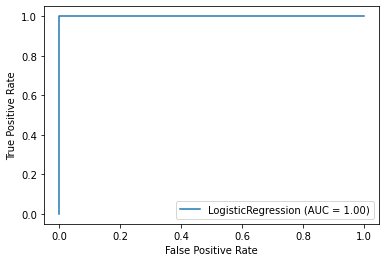

In [316]:
#ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.
#the plot shows that the model is making predictions on the test dataset extremely well
plot_roc_curve(clf, X_test, y_test)

# Precision-Recall Curve

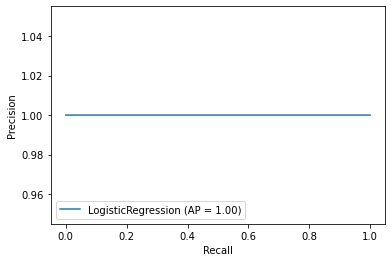

In [317]:
#this model is performing very well on the test dataset, we can see the precision is flat at 1.00
plot_precision_recall_curve(clf, X_test, y_test)

In [318]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

# Model Metrics

In [319]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.00000
AUC = 1.00000
Average Precision = 1.00000

Using 0.5 as threshold:
Accuracy = 1.00000
Precision = 1.00000
Recall = 1.00000
F1 score = 1.00000

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6217
           1       1.00      1.00      1.00      3934

    accuracy                           1.00     10151
   macro avg       1.00      1.00      1.00     10151
weighted avg       1.00      1.00      1.00     10151



# Confusion Matrix

Confusion Matrix


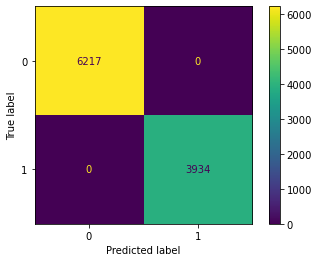

In [320]:
#the matrix below aligns with the accuracy and precision seen above. The predicted label was correctly identified 6217 times for 0 and 3934 for 1 and incorrectly identified 0 times on both classes
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

# Variable Coefficients

In [321]:
#coefficients of features 
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,7.484030
1,arrival_date_month_August,0.612783
2,arrival_date_month_February,0.578285
3,arrival_date_month_January,0.166261
4,arrival_date_month_July,0.598924
5,arrival_date_month_June,0.916779
6,arrival_date_month_March,0.373099
7,arrival_date_month_May,1.039152
8,assigned_room_type_B,0.184476
9,assigned_room_type_C,0.048259


In [322]:
#units of numeric cols table
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,lead_time,107.901500
1,arrival_date_year,0.000000
2,arrival_date_week_number,9.405080
3,arrival_date_day_of_month,8.793622
4,stays_in_weekend_nights,1.017809
5,stays_in_week_nights,1.987938
6,adults,0.494898
7,children,0.435437
8,babies,0.080599
9,previous_bookings_not_canceled,1.714779


# Insights Drawn from Model:

-There is a 81.67% increase in odds of a cancellation for every 1 unit increase in lead time(107.9)

-There is a 18.81% increase in odds of a cancellation for every 1 unit increase in adr ($52.22)

-The odds of cancellation for reserved_room_type_D to the odds of reserved_room_type_A is .71

-There is a 98% decrease in odds of a cancellation for every 1 unit increase in required_car_parking_spaces (.231)

-The odds of cancellation for market_segment_Groups to the odds of market_segment_Aviation is 9.47 

-There is a 14.61% decrease in odds of a cancellation for every 1 unit increease of total_of_special_requests (.84)



# Percentage Increase/Decrease Odds of Cancellations/Unit

In [323]:
coefficients = np.hstack((clf.intercept_, (np.exp(clf.coef_[0])-1)*100))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})


,variable,coefficient
0,intercept,7.484030
1,arrival_date_month_August,84.556033
2,arrival_date_month_February,78.297800
3,arrival_date_month_January,18.088121
4,arrival_date_month_July,82.015870
5,arrival_date_month_June,150.121984
6,arrival_date_month_March,45.222824
7,arrival_date_month_May,182.681761
8,assigned_room_type_B,20.258755
9,assigned_room_type_C,4.944203
